# Predicting Stock Price Direction using Support Vector Machines

### Import Necessary Libraries

In [1]:
# Machine learning 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

# For data manipulation 
import pandas as pd 
import numpy as np 

# To plot 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') 

# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
# Read the csv file using read_csv 
# method of pandas 
df = pd.read_csv('Reliance.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


### Exploratory Data Analysis

In [3]:
# Changes The Date column as index columns 
df.index = pd.to_datetime(df['Date']) 
df 

# drop The original date column 
df = df.drop(['Date'], axis='columns') 
df 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0


In [4]:
df.shape

(1233, 6)

In [5]:
# checking null values
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [6]:
df = df.dropna(axis=0, how='any')

In [7]:
df.shape

(1232, 6)

In [8]:
# Create predictor variables 
df['Open-Close'] = df.Open - df.Close 
df['High-Low'] = df.High - df.Low 

# Store all predictor variables in a variable X 
X = df[['Open-Close', 'High-Low']] 
X.head() 

,Open-Close,High-Low
Date,,
2015-11-18,7.799988,10.674988
2015-11-19,-7.924988,10.725006
2015-11-20,-6.424988,13.625000
2015-11-23,-1.875000,5.850006
2015-11-24,-7.350006,10.274994


In [9]:
# Target variables 
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) 
y


array([1, 1, 1, ..., 1, 0, 0])

In [10]:
split_percentage = 0.8
split = int(split_percentage*len(df)) 

# Train data set 
X_train = X[:split] 
y_train = y[:split] 

# Test data set 
X_test = X[split:] 
y_test = y[split:]

## Fitting the Model 

In [11]:
# Support vector classifier 
cls = SVC().fit(X_train, y_train)

In [12]:
df['Predicted_Signal'] = cls.predict(X)

In [13]:
# Calculate daily returns 
df['Return'] = df.Close.pct_change()

In [14]:
# Calculate strategy returns 
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [15]:
# Calculate Cumulutive returns 
df['Cum_Ret'] = df['Return'].cumsum() 
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,7.799988,10.674988,1,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-7.924988,10.725006,1,0.024945,0.024945,0.024945
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,-6.424988,13.625000,1,0.012945,0.012945,0.037890
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,-1.875000,5.850006,1,0.007287,0.007287,0.045177
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,-7.350006,10.274994,1,0.014626,0.014626,0.059804
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,-7.550049,48.800049,1,0.016507,0.000000,1.750897
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,91.800049,116.900024,1,-0.041904,-0.041904,1.708994
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,1.000000,43.449951,0,-0.008612,-0.008612,1.700382


In [16]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open-Close',
       'High-Low', 'Predicted_Signal', 'Return', 'Strategy_Return', 'Cum_Ret'],
      dtype='object')

In [17]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,7.799988,10.674988,1,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-7.924988,10.725006,1,0.024945,0.024945,0.024945,0.024945
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,-6.424988,13.625000,1,0.012945,0.012945,0.037890,0.037890
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,-1.875000,5.850006,1,0.007287,0.007287,0.045177,0.045177
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,-7.350006,10.274994,1,0.014626,0.014626,0.059804,0.059804
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,-7.550049,48.800049,1,0.016507,0.000000,1.750897,1.977785
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,91.800049,116.900024,1,-0.041904,-0.041904,1.708994,1.935881
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,1.000000,43.449951,0,-0.008612,-0.008612,1.700382,1.927269


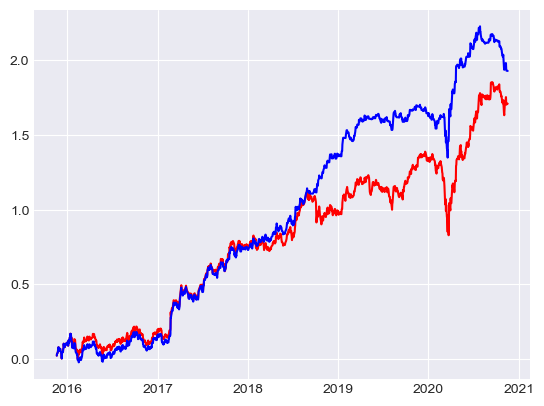

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(df['Cum_Ret'],color='red') 
plt.plot(df['Cum_Strategy'],color='blue')

# Conclusion

* **Performance Comparison:** In the graph, the relative performance of my strategy ('Cum_Strategy') against the benchmark or the original returns ('Cum_Ret') is higher, that means it's generating higher cumulative returns compared to just holding the asset.

* **Strategy Effectiveness:** In 2016-2017 Cum_Strategy was lower, then from 2019 it was higher.  It indicates that my strategy is effective in generating additional returns compared to simply holding the asset.

* **Volatility and Risk:** The volatility of the Blue line is almost similar to the red line. So, my strategy is not much riskier.

* **Drawdown Analysis:** The drawdown is similar in both the lines between 2020 & 2021, which is understandable given the Pandemic & the lockdown period associated with it.

* **Periods of Outperformance:** Between 2019 & 2020 blue line significantly outperforms the red line, that means my strategy from Support Vector Machine Model will outperform Cum_Ret over longer period of time.